# House prices predictions

## Feature analysis 

- Regressione classica
- Feature reduction (PCA, SVD)
- Clustering alle case (togliendo prezzo)
- cross validation or hold-out

In [88]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [96]:
houses = pd.read_csv("../datasets/house_prices/train.csv")
houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Build datasets

In [100]:
numerical_houses = houses._get_numeric_data()
numerical_houses = numerical_houses.drop(['Id'], axis=1)
#see how big the df has become
print(num_houses_na_median.shape)
numerical_houses.head()

(1460, 38)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [101]:
#num_houses_na_median contain the numerical features of houses 
#with NA values replaced by median
num_houses_na_median = houses._get_numeric_data()
for col in num_houses_na_median:
    med = num_houses_na_median[col].median(skipna=True)
    num_houses_na_median[col] = num_houses_na_median[col].fillna(med)
num_houses_na_median.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


## Generical Analysis

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

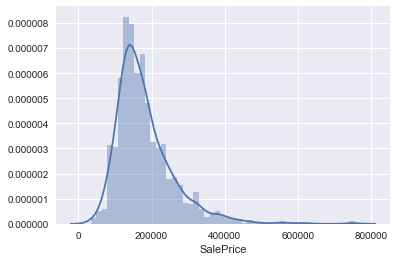

In [102]:
sns.distplot(numerical_houses['SalePrice']);
numerical_houses['SalePrice'].describe()

Analizzo mappa di calore:

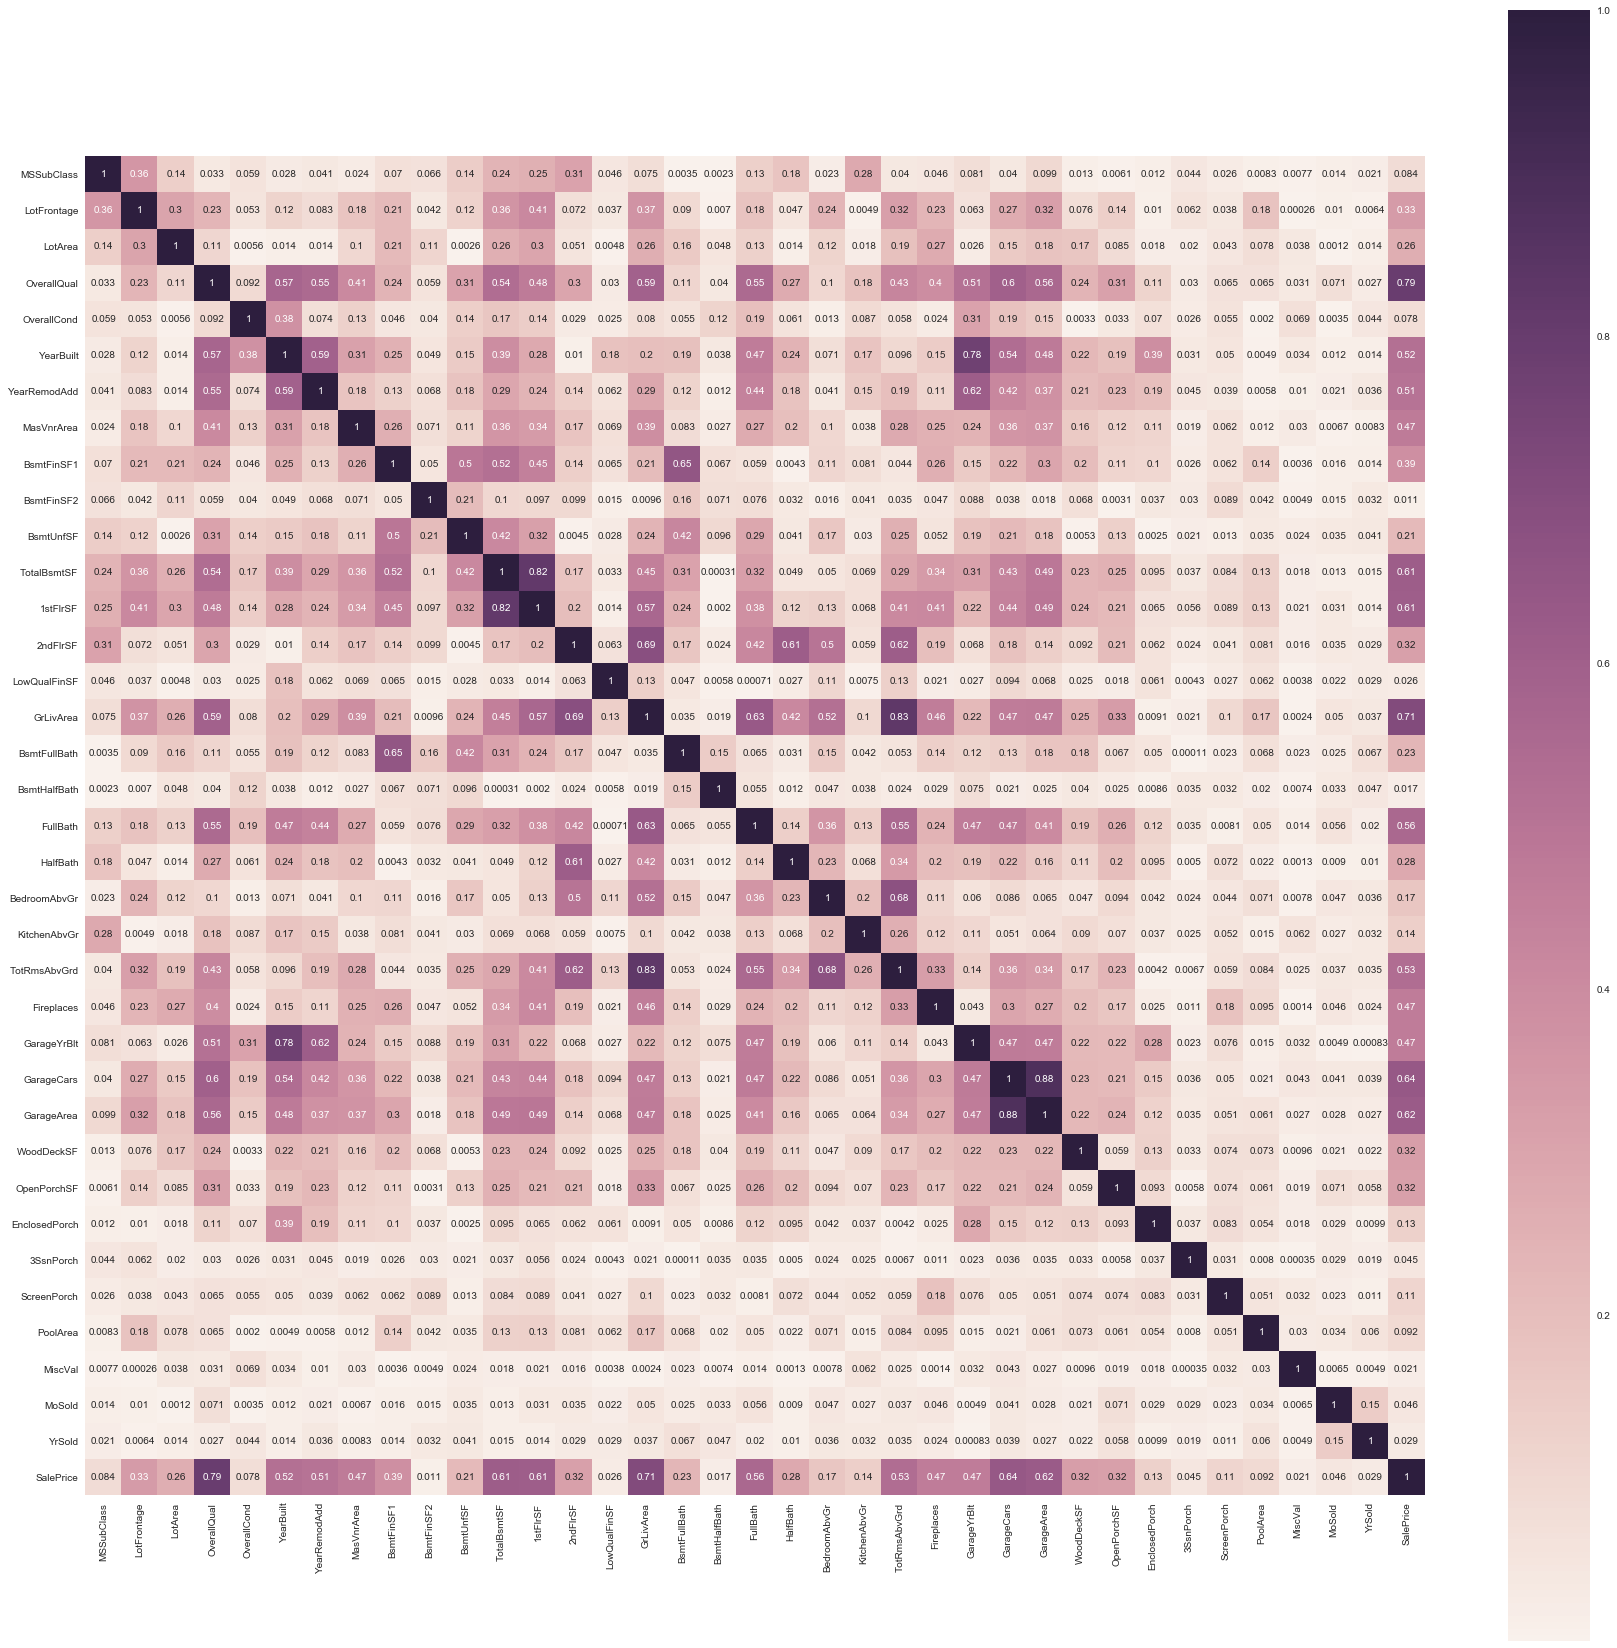

In [103]:
corrmat = numerical_houses.corr().abs()
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corrmat, annot=True, square=True);

Seleziono le features con correlazione >0.75:

In [104]:
soglia = 0.75
s = corrmat.unstack()
best_features = s[s<1].sort_values()[s>soglia]
l1, l2 = zip(*best_features.index.tolist())
name_best_features = list(set(l1).intersection(l2))
print("Le features con correlazione > "+str(soglia)+" sono: ")
best_features


Le features con correlazione > 0.75 sono: 


YearBuilt     GarageYrBlt     0.777182
GarageYrBlt   YearBuilt       0.777182
SalePrice     OverallQual     0.790982
OverallQual   SalePrice       0.790982
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
GrLivArea     TotRmsAbvGrd    0.825489
TotRmsAbvGrd  GrLivArea       0.825489
GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
dtype: float64

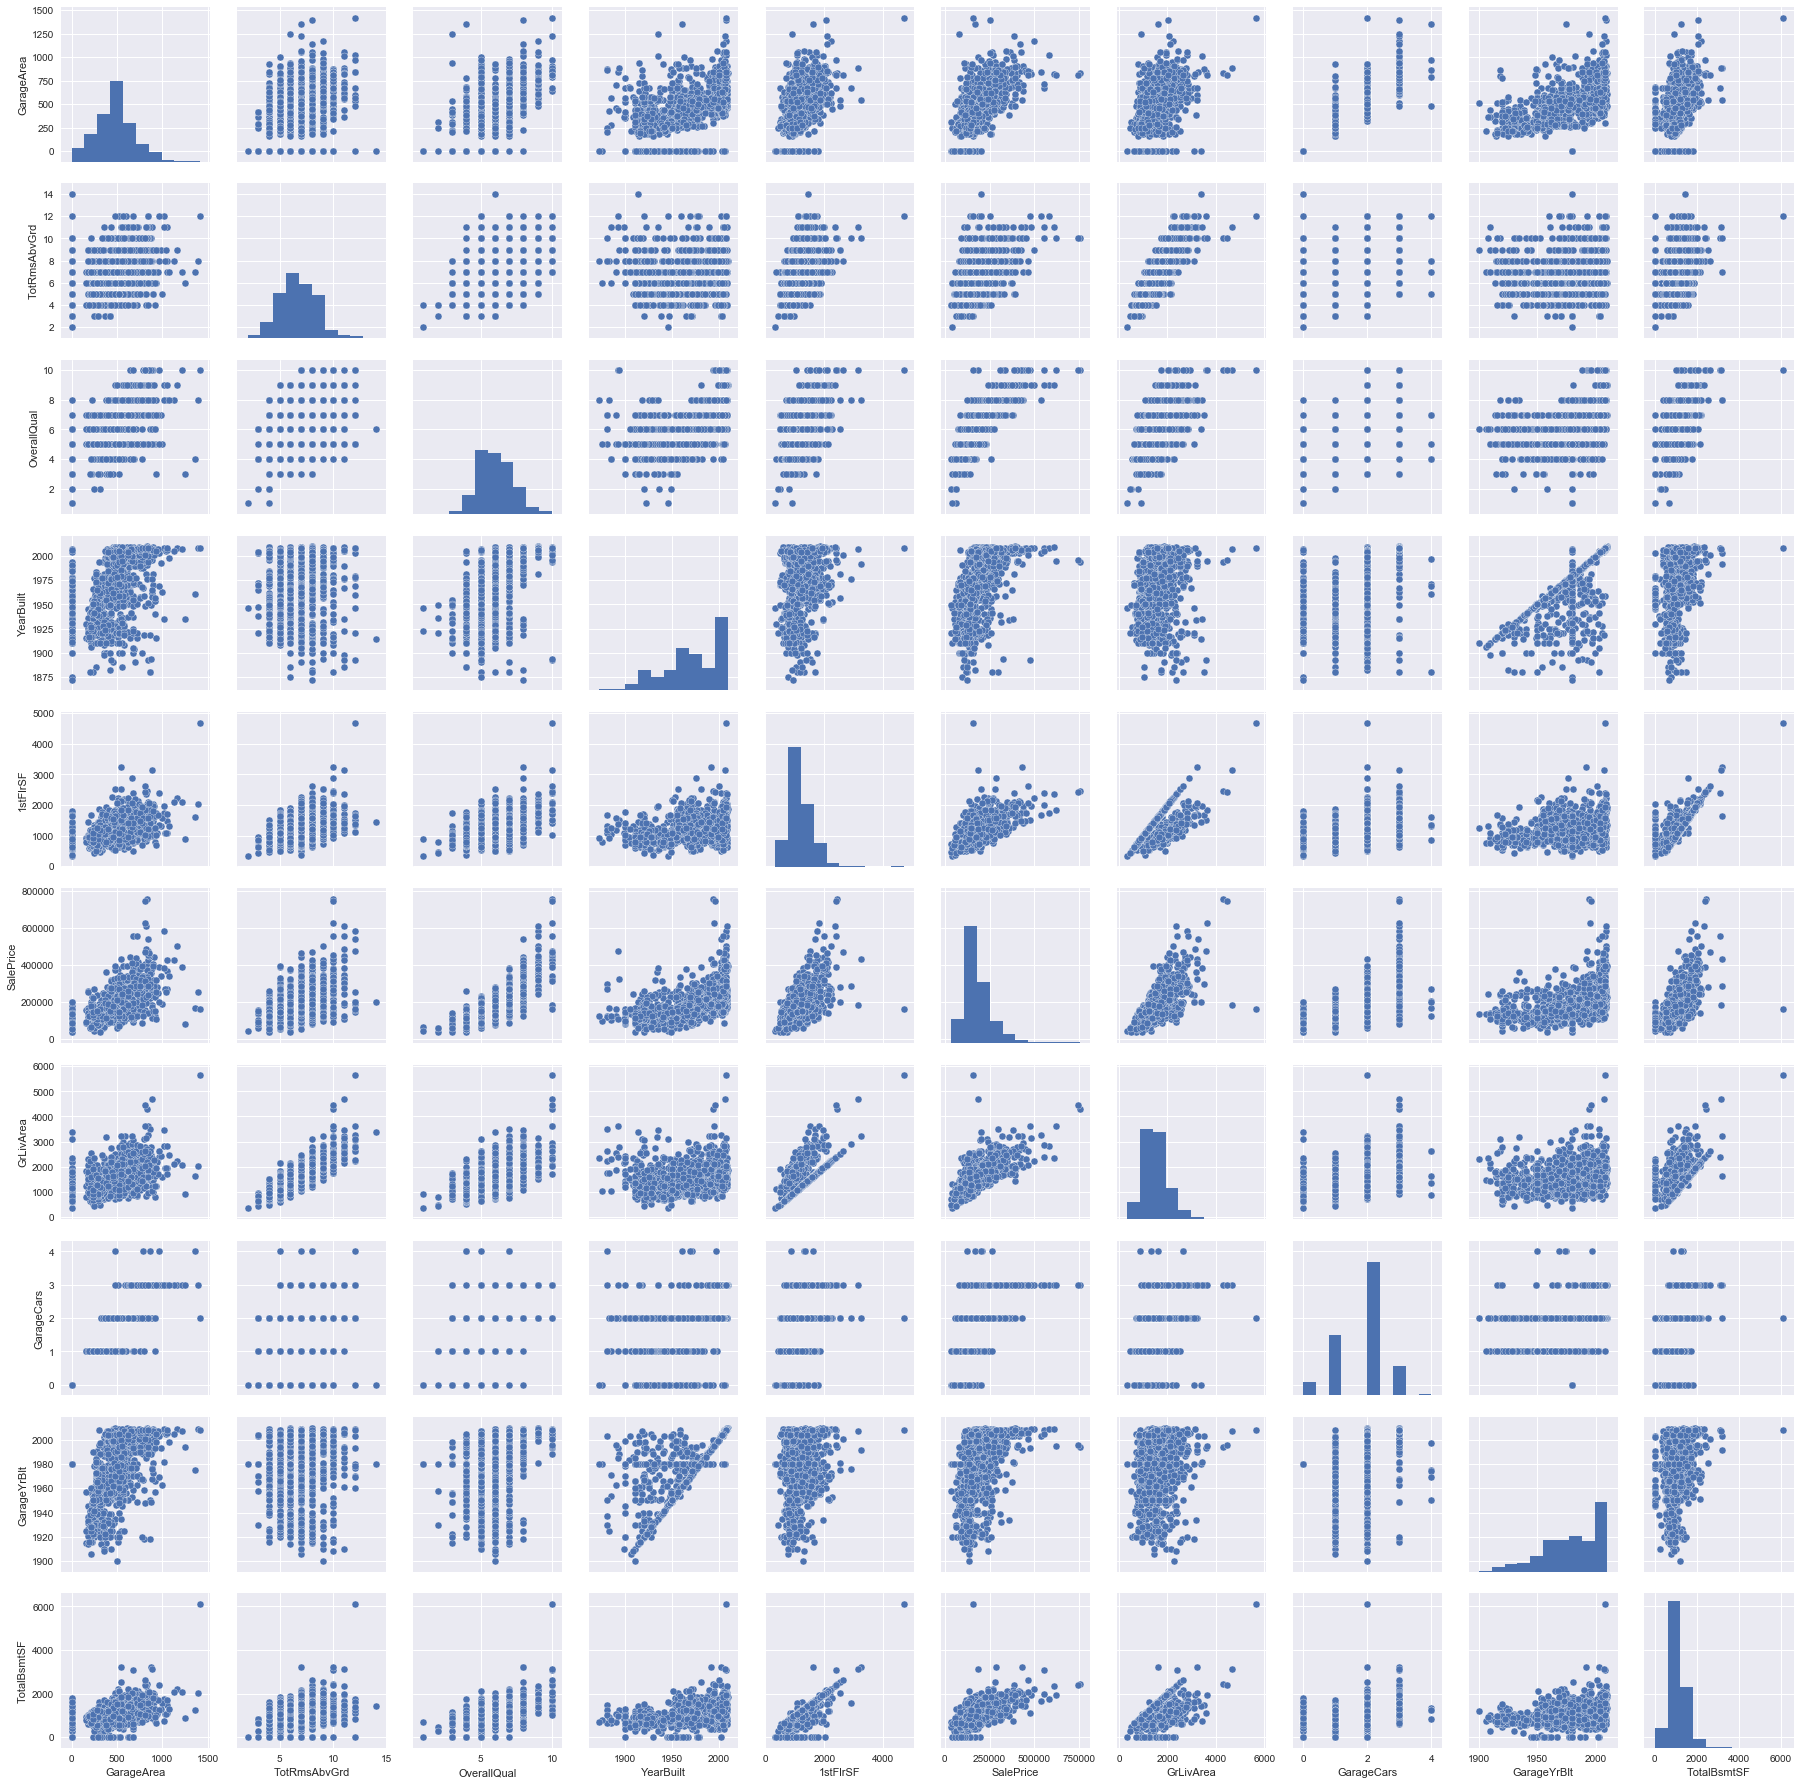

In [105]:
#scatterplot
sns.set()
sns.pairplot(houses[name_best_features], size = 2.5)
plt.show();

In [106]:
#let's select the features with highest correlation wrt the attribute 'SalePrice'
saleCorr = corrmat['SalePrice']
highest_corr_feats = saleCorr.nlargest(10)
highest_corr_feats

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

As we can notice from the results, we picked the data with higher correlation wrt to the target attribute.
There are a couple of things that we may consider:
- as we expected OverallQual and GrLivArea are the dominant values for the price, but pretty surprisingly we don't find Neighborhood even though it's reasonable to think the the price of a house should also depends on that  
- GarageCars and GarageArea have a similar correlation that's probably because they are the same thing i.e. the numbers of cars it's strictly dependent on how big a garage is, so we may consider to drop one of those features cause there are both telling us the same thing


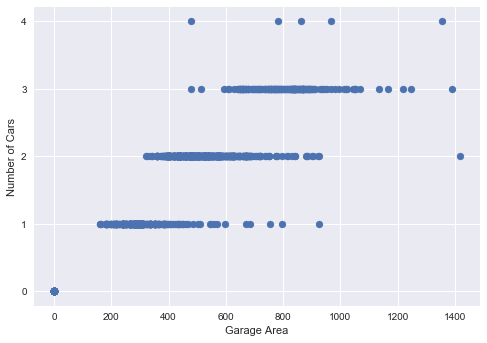

In [107]:
#let's make sure of the relation between GarageCars and GarageArea with a simple scatterplot
x_axis = houses['GarageArea']
y_axis = houses['GarageCars']
plt.scatter(x_axis,y_axis)
plt.xlabel('Garage Area')
plt.ylabel('Number of Cars')
plt.yticks(np.arange(0,5))
plt.show()

Not as much as we expected but there is still a tendence about the relation we said.

### Regressione lineare

In [48]:
# Split the data into training/testing sets
#houses_X_train = houses_X[:-20]
#houses_X_test = houses_X[-20:]

# Split the targets into training/testing sets
#houses_y_train = houses_y[:-20]
#houses_y_test = houses_y[-20:]

#let's stick all together in a function in order to be able to use it all over the notebook

def linRegr(model, iterations, df, test_size):
    tot_score = 0.
    tot_rmse = 0.
    for i in range(iterations):
        train, test = train_test_split(df, test_size=test_size)
    
        X_train = train.drop(['SalePrice'], axis=1)
        y_train = train['SalePrice']
        X_test = test.drop([ 'SalePrice'], axis=1)
        y_test = test['SalePrice']    
    
        # Train the model using the training sets
        model.fit(X_train, y_train)

        # Coefficients: this is the m term in the formula f(x) = mx + q
        #print('Coefficients: \n', regr.coef_, regr.intercept_)
        pred = model.predict(X_test)
        emp_pred_values = pd.Series(pred, index=X_test.index)
        print(pd.concat([emp_pred_values.head(),y_test.head()], axis=1))
        # Mean squared error
        rmse = mean_squared_error(y_test, pred)**0.5
        print("Root mean squared error: %.2f"% rmse)
        # Explained variance score: 1 is perfect prediction
        score = model.score(X_test, y_test)
        print('Variance score: %.2f' % score)
        tot_rmse += rmse
        tot_score += score
    
    print('\nAverage score: %.2f' % float(tot_score/iterations))
    print('Average rmse: %.2f' % float(tot_rmse/iterations))    

In [108]:
#using the whole dataset

# Create linear regression object
model = linear_model.LinearRegression()
linRegr(model, 2, df=num_houses_na_median, test_size=0.3)

                  0  SalePrice
1367  121063.675283     127000
427    86022.788175     109008
434    64319.460512      81000
215   143703.737571     134450
332   311767.804258     284000
Root mean squared error: 50153.76
Variance score: 0.57
                 0  SalePrice
454  172100.498819     188000
88    42148.126371      85000
361  139839.952368     145000
783  161756.015317     165500
945  155279.139549     124900
Root mean squared error: 36230.69
Variance score: 0.81

Average score: 0.69
Average rmse: 43192.23


We may now try to train the same model but only using the selected features wrt to the correlation with 'SalePrice'

In [109]:
#As we mentioned above we drop GarageArea 
cols = highest_corr_feats.drop('GarageArea',axis=0).index
highest_corr_df = houses[cols]
#highest_corr_df.head()
model=linear_model.LinearRegression() 
linRegr(model=model,iterations=10, df=highest_corr_df, test_size=0.3) #this would get rid of 'SalePrice' column as well

                  0  SalePrice
13    234267.180797     279500
1287  184775.532608     190000
689   195892.613498     194700
471   216768.785819     190000
1328  266053.917090     256000
Root mean squared error: 49201.34
Variance score: 0.63
                  0  SalePrice
1094  107742.693866     129000
38    116845.412107     109000
143   221923.147164     204000
1410  222424.883743     230000
458   190697.947337     161000
Root mean squared error: 39844.51
Variance score: 0.76
                 0  SalePrice
471  217686.864345     190000
757  162479.424998     158900
562   98583.664759     108000
325  113951.068662      87000
149  124554.456622     115000
Root mean squared error: 44661.82
Variance score: 0.77
                 0  SalePrice
418  105130.956087     126000
339  154240.747209     155000
576  162541.708980     145000
501  218193.415771     226700
984  158198.074269     126000
Root mean squared error: 35350.77
Variance score: 0.77
                  0  SalePrice
1251  217419.9406

We have improved a little bit but not so much!!

### Alberi di decisione

In [115]:
from sklearn import tree
tree_model=tree.DecisionTreeRegressor()
iterations = 10
linRegr(model=tree_model, df=num_houses_na_median, iterations=iterations, test_size=0.3)

             0  SalePrice
300   164900.0     157000
352    79000.0      95000
1160  177000.0     146000
677    79500.0     109500
530   183200.0     175000
Root mean squared error: 44142.67
Variance score: 0.70
             0  SalePrice
32    232600.0     179900
1121  221500.0     212900
904   112500.0     125500
1234  124500.0     130000
994   318000.0     337500
Root mean squared error: 39661.92
Variance score: 0.78
             0  SalePrice
939   335000.0     244400
54    137500.0     130000
50    185000.0     177000
1442  335000.0     310000
1454  181134.0     185000
Root mean squared error: 43457.80
Variance score: 0.71
             0  SalePrice
1302  250000.0     290000
291   133000.0     135900
384   231500.0     240000
883   160000.0     118500
1134  181000.0     169000
Root mean squared error: 42159.16
Variance score: 0.68
             0  SalePrice
1099  162900.0     157000
38    144900.0     109000
625   128000.0     160000
242   107400.0      79000
104   122000.0     169500


In [116]:
test_houses = pd.read_csv("../datasets/house_prices/test.csv")


X = numerical_houses.drop(['SalePrice'], axis=1).dropna(axis=1)
y = numerical_houses['SalePrice']   
columns = (list(numerical_houses.columns))
columns.remove('SalePrice')
test_num_houses = test_houses[columns]
print(test_num_houses.shape)
tree_model.fit(X, y)
pred = tree_model.predict(test_num_houses)
#print(pred)


(1459, 36)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [45]:
#let's try only the high_corr_features as before
linRegr(model=tree_model,iterations=10, df=highest_corr_df, test_size=0.3) #this would get rid of 'SalePrice' column as well


             0  SalePrice
0     157000.0        NaN
1      62383.0        NaN
2     155000.0        NaN
3     148000.0        NaN
4     224000.0        NaN
171        NaN   215000.0
508        NaN   161000.0
625        NaN   160000.0
1220       NaN   115000.0
1452       NaN   145000.0
Root mean squared error: 40127.19
Variance score: 0.74
             0  SalePrice
0     305000.0        NaN
1     151400.0        NaN
2     168300.0        NaN
3     193500.0        NaN
4     185000.0        NaN
423        NaN   315000.0
603        NaN   151000.0
721        NaN   143000.0
731        NaN   187500.0
1207       NaN   200000.0
Root mean squared error: 42344.09
Variance score: 0.69
            0  SalePrice
0    204000.0        NaN
1     73000.0        NaN
2    159500.0        NaN
3    205000.0   140000.0
4     98000.0        NaN
222       NaN   179900.0
256       NaN   207500.0
353       NaN   105900.0
437       NaN   119000.0
Root mean squared error: 43252.12
Variance score: 0.65
            0

### Other predictive models

In [39]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

data = houses.values
X = data[:,0:33]
Y = data[:,33] 
validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

scoring = 'accuracy'

# Spot Check Algorithms
models = []
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ValueError: could not convert string to float: 'Av'

## Feature reduction
### Principal component analysis

In [ ]:
from sklearn import decomposition
#numerical_houses = numerical_houses.drop(['SalePrice'], axis=1)

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(numerical_houses)
reducted_houses = pd.DataFrame(data=pca.transform(numerical_houses))
reducted_houses['SalePrice'] = houses['SalePrice']
reducted_houses.shape

In [ ]:
from sklearn import tree
tree_model=tree.DecisionTreeRegressor()
linRegr(model=tree_model,iterations=100, df=reducted_houses, test_size=0.3)